Find articles that made it to certain journals and compare key words.

In [5]:
#Need to add parent directoy to sys.path to find 'metadataDB'
import sys
sys.path.append('../../')

%matplotlib inline
import matplotlib.pyplot as plt 
import time
import numpy as np

# Natural language processing toolkit
# To use this, run nltk.download() and download 'stopwords'
from nltk.corpus import stopwords
s=stopwords.words('english') + ['']

# SQL
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from metadataDB.declareDatabase import *
from sqlalchemy import or_

engine = create_engine("sqlite:///../../arXiv_metadata.db", echo=False)
Base.metadata.bind = engine
DBsession = sessionmaker(bind=engine)
session = DBsession()

In [6]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Physics Review Letters%'),
                                          Article.journal_ref.like('Phys. Rev. Lett.%'),
                                          Article.journal_ref.like('PRL%'),
                                          ))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultPRL = query.all()

In [7]:
query = session.query(Article).filter(or_(Article.journal_ref.like('Nature%'),
                                          Article.journal_ref.like('Nat.%'),
                                          Article.journal_ref.like('Science%')))
# query = session.query(Article).filter(Article.journal_ref.like('PRL%'))
resultNatureScience = query.all()

In [8]:
abstract = dict()
abstractPRL = dict()
title = dict()
titlePRL = dict()

numWords = 0
numArticles = len(resultPRL)

start = time.time()
for item in resultPRL:
#     print item.abstract
    for word in set((item.abstract).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in abstractPRL.keys():
#                 abstractPRL[word] += 1
#             else:
#                 abstractPRL[word] =1
            if word in abstract.keys():
                abstract[word] -= 1./numArticles
            else:
                abstract[word] = -1./numArticles
            numWords += 1
            
    for word in set((item.title).replace('\n',' ') \
                               .replace('\\','') \
                               .replace('(','') \
                               .replace(')','') \
                               .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in titlePRL.keys():
#                 titlePRL[word] += 1
#             else:
#                 titlePRL[word] =1
            if word in title.keys():
                title[word] -= 1./numArticles
            else:
                title[word] = -1./numArticles
            numWords += 1

total_time = time.time() - start
print "%f sec., %i articles, %i words" % (total_time, numArticles, numWords)
print "%0.0f articles per second" % (numArticles/total_time)
print "%0.0f words per second" % (numWords/total_time)

473.879448 sec., 14390 articles, 698958 words
30 articles per second
1475 words per second


In [9]:
abstractNature = dict()
titleNature = dict()

numWords = 0
numArticles = len(resultNatureScience)

start = time.time()
for item in resultNatureScience:
#     print item.abstract
    for word in set((item.abstract).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in abstractNature.keys():
#                 abstractNature[word] += 1
#             else:
#                 abstractNature[word] =1
            if word in abstract.keys():
                abstract[word] += 1./numArticles
            else:
                abstract[word] = 1./numArticles
        numWords += 1

    for word in set((item.title).replace('\n',' ') \
                                   .replace('\\','') \
                                   .replace('(','') \
                                   .replace(')','') \
                                   .split(' ')):
        if (word.lower() not in s) and (word.isalpha()):
#             if word in titleNature.keys():
#                 titleNature[word] += 1
#             else:
#                 titleNature[word] =1
            if word in title.keys():
                title[word] += 1./numArticles
            else:
                title[word] = 1./numArticles
        numWords += 1

total_time = time.time() - start
print "%f sec., %i articles, %i words" % (total_time, numArticles, numWords)
print "%0.0f articles per second" % (numArticles/total_time)
print "%0.0f words per second" % (numWords/total_time)

364.410622 sec., 3384 articles, 391275 words
9 articles per second
1074 words per second


In [10]:
session.close()

In [11]:
# Want to sort dictionary by values. Convert it to a list of tuples so we can use python's sort functions
abstract_wordlist = sorted([(key, val) for key, val in abstract.iteritems()], key=lambda x: x[1])
title_wordlist = sorted([(key, val) for key, val in title.iteritems()], key=lambda x: x[1])

In [12]:
abstract_best_and_worst = abstract_wordlist[0:10] + abstract_wordlist[-11:-1]
print abstract_best_and_worst

[(u'model', -0.08260998493502755), (u'study', -0.07388043640759843), (u'find', -0.04839152320448059), (u'function', -0.04448609078079979), (u'discuss', -0.03383177508678413), (u'numerical', -0.033741459215340774), (u'finite', -0.031654049551747915), (u'propose', -0.031580614000069576), (u'consider', -0.030709203429621232), (u'behavior', -0.03069211775316845), (u'properties', 0.07191172290975571), (u'electronic', 0.07273052109670292), (u'optical', 0.08001320854218037), (u'many', 0.08081229248706667), (u'information', 0.0897744279994807), (u'quantum', 0.0906568867597554), (u'fundamental', 0.1008003160850145), (u'demonstrate', 0.1021335738470856), (u'high', 0.10349143334039705), (u'new', 0.11565220462726043)]


In [13]:
title_best_and_worst = title_wordlist[0:10] + title_wordlist[-11:-1]
print title_best_and_worst

[(u'model', -0.01651844020916811), (u'systems', -0.013146401247254372), (u'Model', -0.01306331393123335), (u'Spin', -0.012809246636668298), (u'Comment', -0.012230058633441536), (u'Phase', -0.012120233876624989), (u'Theory', -0.011742295427774323), (u'Hall', -0.010656944259623491), (u'States', -0.009134019060386286), (u'Entanglement', -0.00856185425589407), (u'photonic', 0.008519098993423662), (u'Universe', 0.008535322171786626), (u'superconductor', 0.00888607139512763), (u'Experimental', 0.00894065520283495), (u'Dirac', 0.008973101559560838), (u'Graphene', 0.009132252992868425), (u'galaxies', 0.00916075650118204), (u'single', 0.009376463166403061), (u'graphene', 0.013793521242917358), (u'Observation', 0.014192940001347253)]


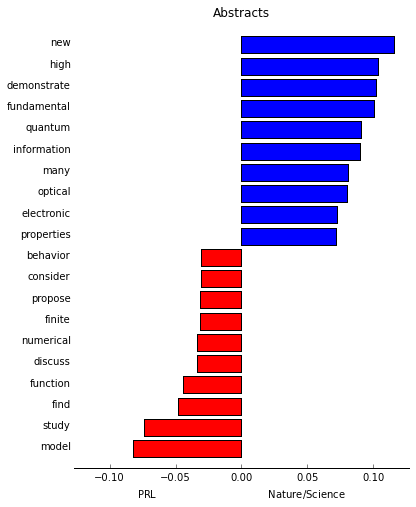

In [14]:
words = [x for (x,y) in abstract_best_and_worst]
vals = np.array([y for (x,y) in abstract_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.title('Abstracts')
plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')

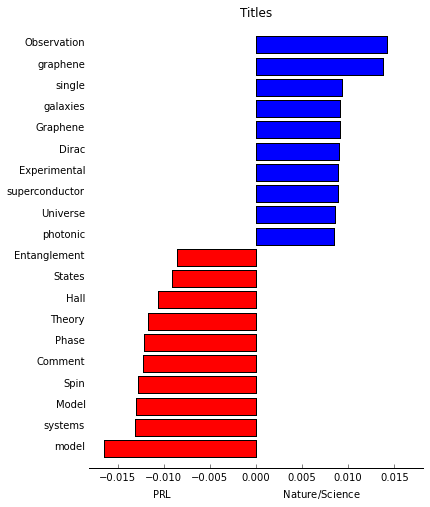

In [15]:
words = [x for (x,y) in title_best_and_worst]
vals = np.array([y for (x,y) in title_best_and_worst])


ind = np.arange(0, len(words))
c = ['b' if x > 0 else 'r' for x in vals]

plt.figure(frameon=False, figsize=(6,8))
plt.barh(ind - 0.5,
         vals,
         color=c)
plt.yticks(ind, words)
plt.ylim(ind[0]-1, ind[-1]+1)
plt.xlim(-1.1*np.max(np.abs(vals)), 1.1*np.max(np.abs(vals)))
plt.title('Titles')
plt.xlabel('PRL$\qquad\qquad\qquad\qquad$Nature/Science')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().xaxis.set_ticks_position('bottom')
plt.gca().yaxis.set_ticks_position('none')